In [1]:
import cv2
import os
import keras

print("fayas")

'''
images_directory = 'datasets/'
no_tumor_images = os.listdir(images_directory + 'no/')

print(no_tumor_images)
'''

fayas


"\nimages_directory = 'datasets/'\nno_tumor_images = os.listdir(images_directory + 'no/')\n\nprint(no_tumor_images)\n"

In [2]:
from google.colab import drive


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import os
from PIL import Image
import numpy as np


import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from tensorflow.keras import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Activation , Dropout , Flatten , Dense
from tensorflow.keras.utils import to_categorical



In [5]:
from google.colab import drive
drive.mount('/content/drive')
     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
images_directory = '/content/drive/MyDrive/datasets/'

no_tumor_images = os.listdir(images_directory + 'no/') 
yes_tumor_images = os.listdir(images_directory + 'yes/') 
#no_tumor_images = '/content/drive/MyDrive/datasets/no'
dataset = []
label = []

INPUT_SIZE = 64

In [7]:
print(no_tumor_images)
print(len(no_tumor_images))
'''
 print(no_tumor_images)
path = 'no0.jpg'
print(path.split('.')[1])
'''


['no0.jpg', 'no452.jpg', 'Thumbs.db', 'no100.jpg', 'no45.jpg', 'no447.jpg', 'no10.jpg', 'no433.jpg', 'no43.jpg', 'no437.jpg', 'no445.jpg', 'no103.jpg', 'no102.jpg', 'no450.jpg', 'no1.jpg', 'no101.jpg', 'no473.jpg', 'no490.jpg', 'no542.jpg', 'no480.jpg', 'no455.jpg', 'no521.jpg', 'no501.jpg', 'no51.jpg', 'no471.jpg', 'no453.jpg', 'no46.jpg', 'no488.jpg', 'no492.jpg', 'no494.jpg', 'no498.jpg', 'no489.jpg', 'no511.jpg', 'no468.jpg', 'no477.jpg', 'no49.jpg', 'no537.jpg', 'no495.jpg', 'no469.jpg', 'no525.jpg', 'no476.jpg', 'no609.jpg', 'no568.jpg', 'no544.jpg', 'no599.jpg', 'no592.jpg', 'no616.jpg', 'no556.jpg', 'no567.jpg', 'no584.jpg', 'no620.jpg', 'no581.jpg', 'no60.jpg', 'no55.jpg', 'no588.jpg', 'no619.jpg', 'no593.jpg', 'no587.jpg', 'no601.jpg', 'no597.jpg', 'no543.jpg', 'no602.jpg', 'no579.jpg', 'no626.jpg', 'no566.jpg', 'no621.jpg', 'no628.jpg', 'no72.jpg', 'no629.jpg', 'no629(1).jpg', 'no804.jpg', 'no7.jpg', 'no67.jpg', 'no73.jpg', 'no777.jpg', 'no814.jpg', 'no69.jpg', 'no66.jpg', '

"\n print(no_tumor_images)\npath = 'no0.jpg'\nprint(path.split('.')[1])\n"

In [8]:
for i , image_name in enumerate(no_tumor_images):
  if(image_name.split('.')[1]=='jpg'):
    image = cv2.imread(images_directory +'no/' + image_name)
    image = Image.fromarray(image , 'RGB')
    image = image.resize((INPUT_SIZE , INPUT_SIZE)) # we are resizing images
    dataset.append(np.array(image))
    label.append(0)


#print(f'dataset of no :: {dataset} ')
print(len(dataset))


153


In [9]:
for i , image_name in enumerate(yes_tumor_images):
  if(image_name.split('.')[1]=='jpg'):
    image = cv2.imread(images_directory +'yes/' + image_name)
    image = Image.fromarray(image , 'RGB')
    image = image.resize((INPUT_SIZE , INPUT_SIZE)) # we are resizing images
    dataset.append(np.array(image))
    label.append(1)

In [10]:
#print(dataset)
print(len(dataset))
print(len(label))

420
420


In [11]:

dataset = np.array(dataset)
label = np.array(label)

x_train , x_test , y_train , y_test = train_test_split(dataset , label , test_size = 0.2 , train_size=0.8
                                                       , random_state=0)
#this is actually x and y coordinate
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

# divide data into 80% and 20%


(336, 64, 64, 3)
(336,)
(84, 64, 64, 3)
(84,)


In [12]:
x_train = normalize(x_train  , axis=1)
x_test = normalize(x_train  , axis=1)

y_train = to_categorical(y_train , num_classes=2)
y_test = to_categorical(y_test , num_classes=2)


In [14]:
from keras.activations import sigmoid
from keras.backend import flatten
from keras.engine.sequential import Sequential
#Model builing 

model  = Sequential() # Initialising CNN 
model.add(Conv2D(32 , (3,3) , input_shape = (INPUT_SIZE , INPUT_SIZE , 3))) # step -1 Convolution 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2 , 2))) # step -2  Pooling 

#Adding second convolutional layer
model.add(Conv2D(32 , (3,3) , kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2 , 2)))

#Adding third convolutional layer

model.add(Conv2D(64 , (3,3) , kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2 , 2)))


model.add(Flatten()) # step -3 :  Flattening (hidden layer)
model.add(Dense(64)) # 
model.add(Activation('relu')) # step - 4 : full connection
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid')) # step - 5 : output layer


#Binary CrossEntropy = 1 , sigmoid

# Training the CNN (Compiler the cnn)
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' ,  metrics=['accuracy'])

#model.fit(x_train ,  y_train ,
 #         batch_size=16 , verbose=1 ,
  #        epochs=10,
   #       validation_data=(x_test  , y_test) ,
    #      shuffle = False)

# training the cnn on training dataset
res = model.fit(np.array(x_train), np.array(y_train), verbose=1, epochs=25 ,
         
         shuffle = False)

model.save('BrainTumor10Epocho.h5')


Epoch 1/25
11/11 [==============================] - 3s 141ms/step - loss: 0.6408 - accuracy: 0.6637
Epoch 2/25
11/11 [==============================] - 2s 143ms/step - loss: 0.5601 - accuracy: 0.6994
Epoch 3/25
11/11 [==============================] - 2s 140ms/step - loss: 0.5029 - accuracy: 0.7679
Epoch 4/25
11/11 [==============================] - 2s 161ms/step - loss: 0.4631 - accuracy: 0.8155
Epoch 5/25
11/11 [==============================] - 4s 388ms/step - loss: 0.4720 - accuracy: 0.7946
Epoch 6/25
11/11 [==============================] - 4s 333ms/step - loss: 0.4229 - accuracy: 0.8095
Epoch 7/25
11/11 [==============================] - 4s 362ms/step - loss: 0.4045 - accuracy: 0.8155
Epoch 8/25
11/11 [==============================] - 4s 418ms/step - loss: 0.3672 - accuracy: 0.8482
Epoch 9/25
11/11 [==============================] - 4s 327ms/step - loss: 0.3467 - accuracy: 0.8631
Epoch 10/25
11/11 [==============================] - 3s 278ms/step - loss: 0.2819 - accuracy: 0.8810

dict_keys(['loss', 'accuracy'])



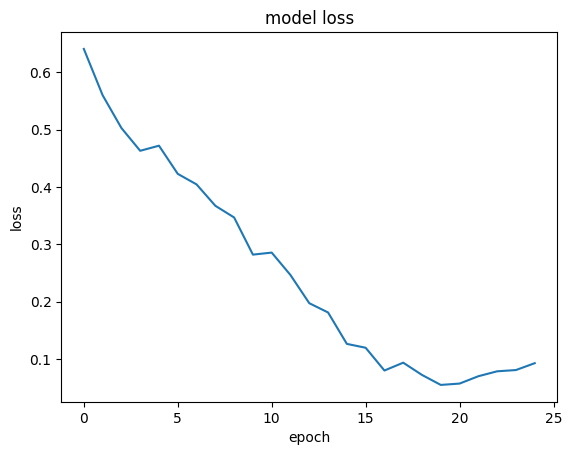



Training accuracy




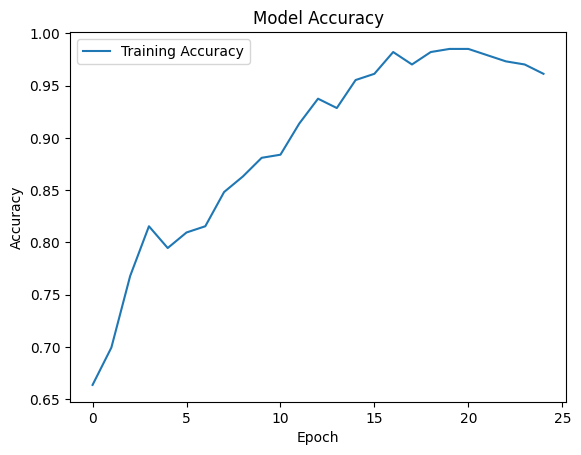

In [15]:
#now testing
import matplotlib.pyplot as plt
print(res.history.keys())
print()
# loss
plt.plot(res.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

print()
print()
print("Training accuracy")
print()
print()
# accuracy

plt.plot(res.history['accuracy'])
plt.title('Model Accuracy')
plt.legend(['Training Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [16]:
import cv2
from keras.models import load_model
from PIL import Image
import numpy as np

In [17]:
model = load_model('BrainTumor10Epocho.h5')

In [18]:
image = cv2.imread('/content/drive/MyDrive/pred/pred5.jpg')
img = Image.fromarray(image)
img = img.resize((64 , 64))
img = np.array(img)

In [19]:

print(img)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 1  1  1]
  [ 9  9  9]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 1  1  1]
  [ 9  9  9]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]
  ...
  [ 0  0  0]
  [ 2  2  2]
  [10 10 10]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


In [20]:
#result = model.predict_classes(img)
input_img = np.expand_dims(img , axis=0)
predict_x=model.predict(input_img) 
result=np.argmax(predict_x,axis=1)
print(f'Now detect img is affected or not :: {result} ')

1/1 [==============================] - 0s 482ms/step
Now detect img is affected or not :: [1] 


In [21]:

if result==1:
  print(f' Detect img is affected by tumor  :: {result} ')
else:
  print(f'Detect img is not affected by tumor :: {result} ')

     

 Detect img is affected by tumor  :: [1] 
